# А.Г. Обрезкова РТ5-61Б

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [124]:
data = pd.read_csv('states_all.csv', sep=",")
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.398961,260.892247,196.764414,NaN


In [125]:
data.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           694
TOTAL_REVENUE                    643
FEDERAL_REVENUE                  643
STATE_REVENUE                    643
LOCAL_REVENUE                    643
TOTAL_EXPENDITURE                643
INSTRUCTION_EXPENDITURE          643
SUPPORT_SERVICES_EXPENDITURE     643
OTHER_EXPENDITURE                694
CAPITAL_OUTLAY_EXPENDITURE       643
GRADES_PK_G                      376
GRADES_KG_G                      286
GRADES_4_G                       286
GRADES_8_G                       286
GRADES_12_G                      286
GRADES_1_8_G                     898
GRADES_9_12_G                    847
GRADES_ALL_G                     286
AVG_MATH_4_SCORE                1383
AVG_MATH_8_SCORE                1387
AVG_READING_4_SCORE             1386
AVG_READING_8_SCORE             1421
dtype: int64

In [126]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1918


# Обработка пропусков в числовых данных

In [127]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ENROLL. Тип данных float64. Количество пустых значений 694, 36.18%.
Колонка TOTAL_REVENUE. Тип данных float64. Количество пустых значений 643, 33.52%.
Колонка FEDERAL_REVENUE. Тип данных float64. Количество пустых значений 643, 33.52%.
Колонка STATE_REVENUE. Тип данных float64. Количество пустых значений 643, 33.52%.
Колонка LOCAL_REVENUE. Тип данных float64. Количество пустых значений 643, 33.52%.
Колонка TOTAL_EXPENDITURE. Тип данных float64. Количество пустых значений 643, 33.52%.
Колонка INSTRUCTION_EXPENDITURE. Тип данных float64. Количество пустых значений 643, 33.52%.
Колонка SUPPORT_SERVICES_EXPENDITURE. Тип данных float64. Количество пустых значений 643, 33.52%.
Колонка OTHER_EXPENDITURE. Тип данных float64. Количество пустых значений 694, 36.18%.
Колонка CAPITAL_OUTLAY_EXPENDITURE. Тип данных float64. Количество пустых значений 643, 33.52%.
Колонка GRADES_PK_G. Тип данных float64. Количество пустых значений 376, 19.6%.
Колонка GRADES_KG_G. Тип данных float64. Количест

In [128]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
encode = LabelEncoder()
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [129]:
#Буду заполнять столбец GRADES_ALL_G, т.к. в нем относительно маленький процент пропусков
num_column = data[['GRADES_ALL_G']]

In [130]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(num_column)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [131]:
strategies=['mean', 'median','most_frequent']

def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(num_column)
    return data_num_imp[mask_missing_values_only]

In [132]:
#количество учеников всех годов обучения заполним средним значением
strategies[0], test_num_impute(strategies[0])

('mean',
 array([913969.49448529, 913969.49448529, 913969.49448529, 913969.49448529,
        913969.49448529, 913969.49448529, 913969.49448529, 913969.49448529,
        913969.49448529, 913969.49448529, 913969.49448529, 913969.49448529,
        913969.49448529, 913969.49448529, 913969.49448529, 913969.49448529,
        913969.49448529, 913969.49448529, 913969.49448529, 913969.49448529,
        913969.49448529, 913969.49448529, 913969.49448529, 913969.49448529,
        913969.49448529, 913969.49448529, 913969.49448529, 913969.49448529,
        913969.49448529, 913969.49448529, 913969.49448529, 913969.49448529,
        913969.49448529, 913969.49448529, 913969.49448529, 913969.49448529,
        913969.49448529, 913969.49448529, 913969.49448529, 913969.49448529,
        913969.49448529, 913969.49448529, 913969.49448529, 913969.49448529,
        913969.49448529, 913969.49448529, 913969.49448529, 913969.49448529,
        913969.49448529, 913969.49448529, 913969.49448529, 913969.49448529,
   

In [133]:
# Я могу отдельно посчитать среднее значение по столбцу и заполнить пропуски тамким способом?
data['GRADES_ALL_G'].fillna(913969.49448529, inplace=True)


# Заполнение пропусков в категориальных данных, кодирование

In [134]:
#столбец 'STATE' не содержит пропусков
data['STATE'].isnull().count()

1918

In [135]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = data['STATE'].values
col = encode.fit_transform(col)
col_s = pd.Series(col)
#добавляем новый закодированный столбец к таблице
data['state_code']= col_s
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,state_code
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.327876,252.187522,207.963517,NaN,0
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,258.859712,1
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.253932,265.366278,206.212716,262.169895,2
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.206028,256.312090,208.634458,264.619665,3
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.398961,260.892247,196.764414,NaN,4


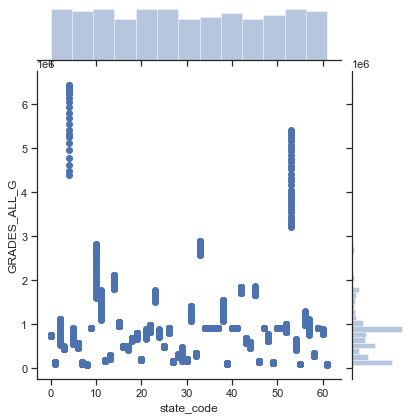

In [137]:
# для пары произвольных колонок данных построить график "Jointplot".
graph = sns.jointplot("state_code", "GRADES_ALL_G", data)

In [140]:
# Для построения моделей машинного обучения возьму признаки  state_code, GRADES_ALL_G, TOTAL_REVENUE
# на основании доходов штата, среднем балле можно делать выводы об уровне успеваемости